In [ ]:
#Cluster Analysis - K-Means clustering
#Example Prolem Adopted from Machina Learning using Python ( Dinesh Kumar)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read Data File
mydata=pd.read_csv("examlogit.csv")
mydata.head()

,no,Loyalty,Brand,Product,Shopping
0,1,1,4,3,5
1,2,1,6,4,4
2,3,1,5,2,4
3,4,1,7,5,5
4,5,1,6,3,4


In [3]:
mydata[mydata.Loyalty==0]

,no,Loyalty,Brand,Product,Shopping
15,16,0,3,1,3
16,17,0,4,6,2
17,18,0,2,5,2
18,19,0,5,2,4
19,20,0,4,1,3
20,21,0,3,3,4
21,22,0,3,4,5
22,23,0,3,6,3
23,24,0,4,4,2
24,25,0,6,3,6


In [4]:
mydata[mydata.Loyalty==1]

,no,Loyalty,Brand,Product,Shopping
0,1,1,4,3,5
1,2,1,6,4,4
2,3,1,5,2,4
3,4,1,7,5,5
4,5,1,6,3,4
5,6,1,3,4,5
6,7,1,5,5,5
7,8,1,5,4,2
8,9,1,7,5,4
9,10,1,7,6,4


In [5]:
#Profiling the clusters
table=pd.pivot_table(mydata,values=["Brand","Product","Shopping"],index=["Loyalty"])
table

,Brand,Product,Shopping
Loyalty,,,
0,3.533333,3.8,3.066667
1,5.666667,4.2,4.000000


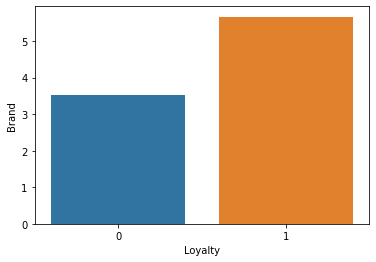

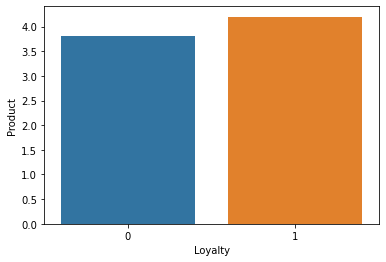

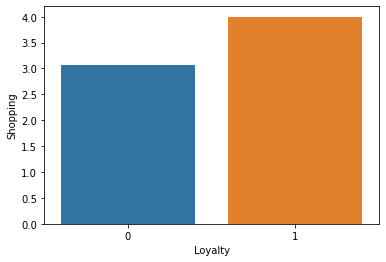

In [6]:
#Differentiation
sns.barplot(x=mydata.Loyalty, y=mydata.Brand, ci=None)
plt.show()
sns.barplot(x=mydata.Loyalty, y=mydata.Product, ci=None)
plt.show()
sns.barplot(x=mydata.Loyalty, y=mydata.Shopping, ci=None)
plt.show()

In [ ]:
#Confirming Clusters by Discriminant

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(mydata,test_size=0.3,random_state=42)

X=X_train.iloc[:,2:5]
X.shape

(21, 3)

In [10]:
Y=X_train["Loyalty"]

[[-0.16068778]
 [-1.25841226]
 [ 0.97278962]
 [ 0.54824198]
 [-0.37641017]
 [-0.66486407]
 [ 1.30389358]
 [-1.31610305]
 [-0.43410095]
 [ 1.30389358]
 [-2.57593095]
 [ 0.54824198]
 [ 1.14586197]
 [-0.43410095]
 [ 3.44572357]
 [ 1.04144934]
 [ 0.32155065]
 [-0.61814223]
 [-2.57593095]
 [ 0.82572695]
 [-1.04268987]]
[1.]


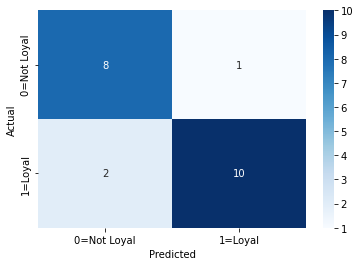

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X,Y)
print(X_lda)
VarExplained=lda.explained_variance_ratio_
print(VarExplained)
Model=lda.fit(X,Y)
Prediction=Model.predict(X)
Prediction
confusion=confusion_matrix(Y,Prediction)
sns.heatmap(confusion,annot=True,cmap="Blues",
           xticklabels=["0=Not Loyal","1=Loyal"],
           yticklabels=["0=Not Loyal","1=Loyal"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [15]:
print(Model.coef_)
Scores=Model.decision_function(X)
Scores=pd.DataFrame(Scores)
Scores.columns=["Economy","LightBeer","Premium"]
Scores

[[1.5135295  0.1138982  0.85983503]]


ValueError: Length mismatch: Expected axis has 1 elements, new values have 3 elements

In [18]:
Posterior=(Model.predict_proba(X))
Posterior=pd.DataFrame(Posterior)
Posterior.columns=["Economy","LightBeer","Premium"]
Posterior

,Economy,LightBeer,Premium
0,9.621083e-01,3.789173e-02,2.509996e-13
1,9.989466e-01,1.053378e-03,6.686454e-14
2,1.136974e-04,9.998863e-01,1.191577e-12
3,2.803350e-12,2.573870e-10,1.000000e+00
4,7.019154e-16,2.275927e-13,1.000000e+00
5,9.999875e-01,1.251959e-05,3.459889e-26
6,9.999996e-01,3.572152e-07,1.111971e-17
7,9.999785e-01,2.152932e-05,3.204026e-15
8,4.045668e-03,9.959543e-01,9.918363e-14
9,1.671949e-03,9.983281e-01,1.011984e-16


In [19]:
Posterior=(Model.predict_proba(X))
Posterior=pd.DataFrame(Posterior)
Posterior.columns=["Economy","LightBeer","Premium"]
print(Posterior.round(4))

    Economy  LightBeer  Premium
0    0.9621     0.0379      0.0
1    0.9989     0.0011      0.0
2    0.0001     0.9999      0.0
3    0.0000     0.0000      1.0
4    0.0000     0.0000      1.0
5    1.0000     0.0000      0.0
6    1.0000     0.0000      0.0
7    1.0000     0.0000      0.0
8    0.0040     0.9960      0.0
9    0.0017     0.9983      0.0
10   0.9808     0.0192      0.0
11   0.0220     0.9780      0.0
12   0.0344     0.9656      0.0
13   0.0000     0.0000      1.0
14   0.0000     0.0000      1.0
15   0.0000     1.0000      0.0
16   0.9818     0.0182      0.0
17   0.9999     0.0001      0.0
18   0.0000     1.0000      0.0
19   0.0002     0.9998      0.0
